In [1]:
!pip install librosa
!pip install scipy
!pip install resampy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display

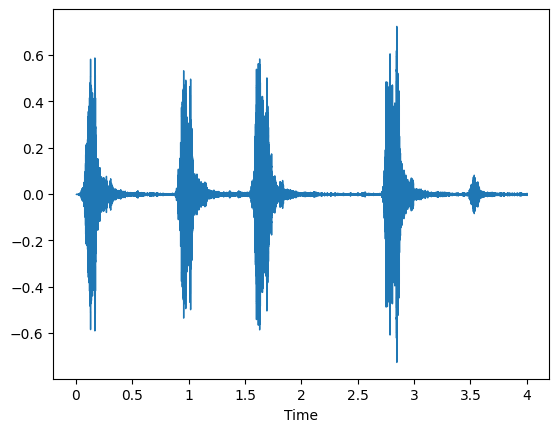

In [3]:
filename='D:/DSP/UrbanSound8K/dog.wav'

# Load the audio
data, sample_rate = librosa.load(filename, sr=None)

# Show the waveform
librosa.display.waveshow(data, sr=sample_rate)

# Play the sound
ipd.display(ipd.Audio(data=data, rate=sample_rate))

# Show the waveform plot
plt.show()


In [4]:
!dir


 Volume in drive D is New Volume
 Volume Serial Number is 087C-5B6B

 Directory of D:\DSP

11/03/2025  12:50 AM    <DIR>          .
11/01/2025  06:18 PM    <DIR>          .ipynb_checkpoints
05/20/2014  01:05 AM           206,432 7064-6-2-0.wav
11/01/2025  06:50 PM           588,192 audio_classification.h5
11/03/2025  12:50 AM            21,764 Audio_classification.ipynb
11/01/2025  07:23 PM           588,542 audio_classification.keras
10/24/2025  12:53 AM               174 audio_classification_data_with_details.csv
10/24/2025  01:58 AM             1,321 audio_mfcc_features.csv
10/24/2025  01:58 AM             1,326 audio_mfcc_features_compact.csv
08/02/2025  11:40 PM            30,752 automama.ipynb
08/02/2025  04:50 PM             1,269 Car color cng
08/02/2025  11:40 PM            25,324 Car game
10/24/2025  12:35 AM    <DIR>          class1
10/24/2025  12:35 AM    <DIR>          drive-simulation-master
07/29/2025  03:41 PM            59,345 DSP EX 05.ipynb
10/24/2025  02:01 AM      

In [5]:
sample_rate


44100

In [6]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [7]:
data

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        1.5258789e-05, -1.5258789e-04, -3.9672852e-04], dtype=float32)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [  6,  -5],
       [  7, -17],
       [ -5, -21]], dtype=int16)

In [10]:
#reading class data

import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10000000)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [11]:
#we have 8732 data for test

### Check whether the dataset is imbalanced
## check data with class 
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [12]:
#Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. 
#The MFCC summarises the frequency distribution across the window size, 
#so it is possible to analyse both the frequency and time characteristics of the sound.
#These audio representations will allow us to identify features for classification.


mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

#number of MFCC coefficients to extract (40 is common for speech tasks)

(40, 345)


In [13]:
mfccs

array([[-5.8873804e+02, -5.7516412e+02, -5.2415161e+02, ...,
        -5.1985004e+02, -5.2368726e+02, -5.2323145e+02],
       [ 0.0000000e+00,  1.7241278e+01,  7.3857735e+01, ...,
         7.7252922e+01,  7.4256088e+01,  7.7246185e+01],
       [ 0.0000000e+00,  1.2498425e+01,  3.6316826e+01, ...,
         3.7159500e+01,  3.6697929e+01,  4.2258583e+01],
       ...,
       [ 0.0000000e+00, -3.9909317e+00,  2.4362099e+00, ...,
         1.5271091e+00, -2.6494141e+00,  1.5928404e+00],
       [ 0.0000000e+00, -3.1520412e+00, -6.6748112e-01, ...,
        -3.0056787e-01, -1.0449967e+00,  3.5728860e-01],
       [ 0.0000000e+00, -1.2033006e+00, -2.5224805e-01, ...,
        -1.4938667e+00, -1.3910368e-01, -1.6462390e+00]], dtype=float32)

In [14]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='D:/DSP/UrbanSound8K/audio/'
metadata=pd.read_csv('D:/DSP/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10000)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [15]:
def features_extractor(file_path):
    # Load the audio file
    #res_type='kaiser_fast' → a resampling method that makes loading faster with small tradeoffs in precision.
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast') 
    
    # Extract MFCC features
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    # Scale the MFCCs (mean across time axis)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

    #It returns a 2D array.(40,N) 
    #40 → number of MFCC coefficients (features per frame)
    #N → number of time frames (depends on audio duration)

In [16]:
pip install librosa soundfile audioread numba resampy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np

from tqdm import tqdm
#tqdm is a Python library that gives you a progress bar when looping.
import os

### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    #audio_dataset_path → main folder where all your dataset is stored.
    #os.path.abspath() → converts it to an absolute path (full path, not relative).
    #'fold' + str(row["fold"]) + '/' → adds the specific subfolder name (e.g., "fold1/").
    #str(row["slice_file_name"]) → adds the filename from the dataset metadata (e.g., "101415-3-0-2.wav").
    #os.path.join() → safely joins them together so it works on all systems (Windows, Linux, etc.).
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])


2227it [01:46, 18.18it/s]

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10000)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
### Label Encoding
y = pd.get_dummies(y).astype(np.float32).values


In [ ]:
y.shape

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

In [ ]:
y

In [ ]:
X_train.shape

In [ ]:
X_test.shape


In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
#Model Creation
import tensorflow as tf
print(tf.__version__)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
#Dense()

In [ ]:
model=Sequential()
# First layer with Input
model.add(Input(shape=(40,)))        # Input layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

# Second layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

# Third layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_labels, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [ ]:
class_labels = [
    'gun_shot',
    'car_horn',
    'children_playing',
    'dog_bark',
     'drilling',
    'engine_idling',
    'air_conditioner',
    'jackhammer',
     'siren',
    'street_music'
]


In [ ]:
import numpy as np

filename = 'D:/DSP/UrbanSound8K/engine_idling.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)

# Predict the class probabilities
prediction = model.predict(prediction_feature)

# Get the index of the highest probability
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Map index to label
predicted_label = class_labels[predicted_class_index]
print(f"Predicted sound class: {predicted_class_index}")
print(f"Predicted sound class: {predicted_label}")
